In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import math

In [2]:
# Reads the adjacency matrix from file
A=np.loadtxt('adjacency.txt')
print("There are",A.shape[0],"nodes.")

There are 328 nodes.


As you can see above, the adjacency matrix is relatively large (328x328): there are 328 persons in the graph. In order to visualize this adjacency matrix, it is convenient to use the 'imshow' function. This plots the 328x328 image where the pixel (i,j) is black if and only if A[i,j]=1.

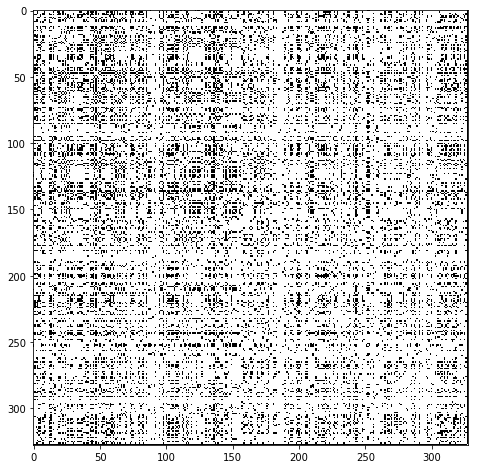

In [3]:
plot.figure(figsize=(8,8))
plot.imshow(A,aspect='equal',cmap='Greys',  interpolation='none')

*a)* Construct in the cell below the degree matrix:
$$
D_{i,i} = {\rm deg}(i) \qquad \text{and} \qquad D_{i,j} = 0 \ \ \text{if} \ i \neq j,
$$
the Laplacian matrix:
$$
L = D - A
$$
and the normalized Laplacian matrix:
$$
L_{\rm norm} = D^{-1/2} L D^{-1/2}.
$$

In [4]:
#Degree Matrix 
D = np.zeros((A.shape[0],A.shape[1]))

for a in range(0,A.shape[1]):
    D[a][a] = sum(A[:,a])
    
#Laplacian Matrix 

L = D - A 

#Normalized Laplacian Matrixs
D_new = np.zeros((D.shape[0],D.shape[1]))
for d in range(0,D.shape[1]): 
    D_new[d][d] = 1/math.sqrt(D[d][d])
    
L_norm = np.matmul(np.matmul(D_new,L),D_new)

b) Using the command 'linalg.eigh' from numpy, compute the eigenvalues and the eigenvectors of $L_{\rm norm}$.

In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(L_norm)

c) We would like to cluster the nodes (i.e. the users) in 3 groups. Using the eigenvectors of $L_{\rm norm}$, assign to each node a point in $R^2$, exactly as in 'Algorithm 1' of the notes where you replace $L$ by $L_{\rm norm}$. Plot these points using the 'scatter' function of matplotlib.

In [6]:
x_dict = {}
for n in range(0,L_norm.shape[0]):
    x_dict[n]= (eigenvectors[:,2][n],eigenvectors[:,3][n])

In [7]:
x_dict = {}
for n in range(0,L_norm.shape[0]):
    x_dict[n]= (eigenvectors[:,1][n],eigenvectors[:,2][n])

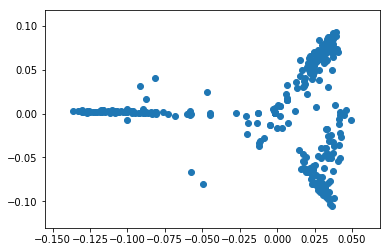

In [8]:
x_values = [value[0] for key, value in x_dict.items()]
y_values = [value[1] for key , value in x_dict.items()]
plot.scatter(x_values,y_values)

d) Using the K-means algorithm (use the built-in function from scikit-learn)

In [9]:
X = np.array([np.array(n) for n in x_dict.values()]).reshape(L_norm.shape[0],2) 

In [10]:
# Replace ??? by the matrix of the points computed in (c)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels=kmeans.labels_
# labels contains the membership of each node

e) Re-order the adjacency matrix according to the clusters computed in the previous question. That is reorder the columns and rows of $A$ to obtain a new adjacency matrix (that represent of course the same graph) such that the $n_1$ nodes of the first cluster correspond to the first $n_1$ rows/columns, the $n_2$ nodes of the second cluster correspond to the next $n_2$ rows/columns, and the $n_3$ nodes of the third cluster correspond to the last $n_3$ rows/columns.
Plot the reordered adjacency matrix using 'imshow'.

In [11]:
sorted_indexes = np.argsort(labels)
reorderedA = A[:,sorted_indexes]
reorderedA = reorderedA[sorted_indexes,:]

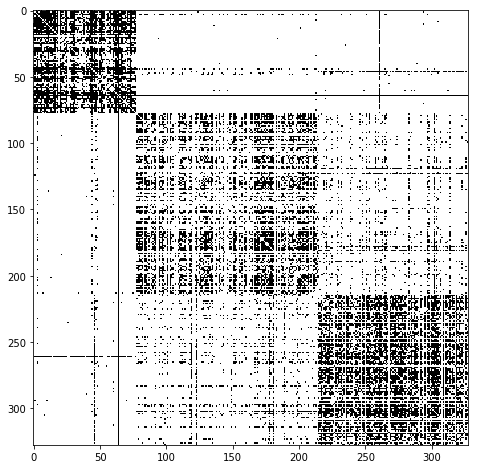

In [13]:
%matplotlib inline
plot.figure(figsize=(8,8))
plot.imshow(reorderedA,aspect='equal',cmap='Greys',  interpolation='none')